In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
# tf.debugging.set_log_device_placement(True)


In [ ]:
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np
from numpy import savez_compressed

LENGTH_X = 2000
INPUT_STARTDATE = datetime(2020, 10, 15, 19)
INPUT_SYMBOL = 'EURUSD'


#     M15    H1     H4     M5     D1
# ----50-----50-----20-----20-----10

mt5.initialize()

m5 = mt5.copy_rates_from(INPUT_SYMBOL, mt5.TIMEFRAME_M5, INPUT_STARTDATE, LENGTH_X * 5)
err_m5 = mt5.last_error()
h4 = mt5.copy_rates_from(INPUT_SYMBOL, mt5.TIMEFRAME_H4, INPUT_STARTDATE, LENGTH_X * 2)
err_h4 = mt5.last_error()
m15 = mt5.copy_rates_from(INPUT_SYMBOL, mt5.TIMEFRAME_M15, INPUT_STARTDATE, LENGTH_X * 4)
err_m15 = mt5.last_error()
h1 = mt5.copy_rates_from(INPUT_SYMBOL, mt5.TIMEFRAME_H1, INPUT_STARTDATE, LENGTH_X * 4)
err_h1 = mt5.last_error()
d1 = mt5.copy_rates_from(INPUT_SYMBOL, mt5.TIMEFRAME_D1, INPUT_STARTDATE, LENGTH_X)
err_d1 = mt5.last_error()

mt5.shutdown()

if err_d1[0] == mt5.RES_S_OK and err_h1[0] == mt5.RES_S_OK and err_h4[0] == mt5.RES_S_OK and err_m5[0] == mt5.RES_S_OK and err_m15[0] == mt5.RES_S_OK:
    savez_compressed(INPUT_SYMBOL + '.npz', d1=d1, m5=m5, m15=m15, h1=h1, h4=h4)
    print('DONE')
else:
    print('ERROR', err)



In [ ]:

# Problem:
# Given historical data
# Return the classification within the next 48 candles, including the current one

# Will it drop more than 0.4% Yes no
# Will it drop more than 0.8% Yes no
# Will it drop more than 1.2% Yes no
# Will it drop more than 1.6% Yes no
# Will it drop more than 2.0% Yes no
# Will it drop more than 2.4% Yes no
# Will it drop more than 2.8% Yes no
# Will it increase more than 0.4% Yes no
# Will it increase more than 0.8% Yes no
# Will it increase more than 1.2% Yes no
# Will it increase more than 1.6% Yes no
# Will it increase more than 2.0% Yes no
# Will it increase more than 2.4% Yes no
# Will it increase more than 2.8% Yes no


# A x B image, 0 -> 1
# R000 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Open price, including the current one, sorted by time desc, scaled based on max and min of that range
# R001 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High price, not including the current one, sorted by time desc, scaled based on max and min of that range
# R002 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Low price, not including the current one, sorted by time desc, scaled based on max and min of that range
# R003 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close price, not including the current one, sorted by time desc, scaled based on max and min of that range
# R004 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Max(Open, Close) price, not including the current one, sorted by time desc, scaled based on max and min of that range
# R005 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Min(Open, Close) price, not including the current one, sorted by time desc, scaled based on max and min of that range
# R006 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close - Open, not including the current one, sorted by time desc, scaled based on max and min of that range
# R007 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
# R008 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Open, not including the current one, sorted by time desc, scaled based on max and min of that range
# R009 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Close, not including the current one, sorted by time desc, scaled based on max and min of that range
# R010 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
# R011 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Open - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
# R012 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Max(Open, Close), not including the current one, sorted by time desc, scaled based on max and min of that range
# R013 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Min(Open, Close), not including the current one, sorted by time desc, scaled based on max and min of that range
# R014 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Max(Open, Close) - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
# R015 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Min(Open, Close) - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
# R016 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Close + Open)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R017 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R018 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Open)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R019 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Close)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R020 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Open + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R021 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Close + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R022 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Max(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R023 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Min(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R024 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Low + Max(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R025 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Low + Min(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
# R026 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Volume, not including the current one, sorted by time desc, scaled based on max and min of that range
# R027 -> R053                        -    Diff from R001 -> R027, sorted by time desc, scaled based on max and min of that range
# R054 -> R080                        -    Diff from R028 -> R054, sorted by time desc, scaled based on max and min of that range
# R081 -> R107                        -    Diff from R055 -> R081, sorted by time desc, scaled based on max and min of that range
# R108 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day sin, including the current one, sorted by time desc, scaled based on -1-1
# R109 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day cos, including the current one, sorted by time desc, scaled based on -1-1
# R110 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of year, including the current one, sorted by time desc, scaled based on 0-365
# R111 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of month, including the current one, sorted by time desc, scaled based on 0-30
# R112 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of month reversed, including the current one, sorted by time desc, scaled based on 0-30
# R113 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of week, including the current one, sorted by time desc, scaled based on 0-6
# R114 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Week sin, including the current one, sorted by time desc, scaled based on -1-1
# R115 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Week cos, including the current one, sorted by time desc, scaled based on -1-1
# R116 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Hour of day, including the current one, sorted by time desc, scaled based on 0-23
# R117 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Minute of hour, including the current one, sorted by time desc, scaled based on 0-59
# R118 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Year sin, including the current one, sorted by time desc, scaled based on -1-1
# R119 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Year cos, including the current one, sorted by time desc, scaled based on -1-1
# R120 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Diff(Time), including the current one, sorted by time desc, scaled based on max and min of that range
# R121 Time
# R122 Will it drop more than 0.4% Yes no
# R123 Will it drop more than 0.8% Yes no
# R124 Will it drop more than 1.2% Yes no
# R125 Will it drop more than 1.6% Yes no
# R126 Will it drop more than 2.0% Yes no
# R127 Will it drop more than 2.4% Yes no
# R128 Will it drop more than 2.8% Yes no
# R129 Will it increase more than 0.4% Yes no
# R130 Will it increase more than 0.8% Yes no
# R131 Will it increase more than 1.2% Yes no
# R132 Will it increase more than 1.6% Yes no
# R133 Will it increase more than 2.0% Yes no
# R134 Will it increase more than 2.4% Yes no
# R135 Will it increase more than 2.8% Yes no



#     M15    H1     H4     M5     D1
# ----50-----50-----20-----20-----10
# |
# 120
# |
# ---------------------------


In [6]:
import numpy as np

baseRate = 0.0008

def self_diff(a: np.ndarray, shift = 1):
    t = a - np.roll(a, -shift)
    return t


# R122 Will it drop more than 0.4% Yes no
# R123 Will it drop more than 0.8% Yes no
# R124 Will it drop more than 1.2% Yes no
# R125 Will it drop more than 1.6% Yes no
# R126 Will it drop more than 2.0% Yes no
# R127 Will it drop more than 2.4% Yes no
# R128 Will it drop more than 2.8% Yes no
# R129 Will it increase more than 0.4% Yes no
# R130 Will it increase more than 0.8% Yes no
# R131 Will it increase more than 1.2% Yes no
# R132 Will it increase more than 1.6% Yes no
# R133 Will it increase more than 2.0% Yes no
# R134 Will it increase more than 2.4% Yes no
# R135 Will it increase more than 2.8% Yes no
def make_labels(raw_data, shift = 48):
    h = raw_data['high']
    l = raw_data['low']
    o = raw_data['open']

    r = np.empty(shape=(14,len(h)), dtype=float)

    hh = [h[i:i + shift] for i in range(len(h))]
    max_ss = np.array([max(x / o[i] - 1) for i, x in enumerate(hh)])

    ll = [l[i:i + shift] for i in range(len(l))]
    min_ss = np.array([min(x / o[i] - 1) for i, x in enumerate(ll)])

    r[0:7] = [min_ss < (-i * baseRate) for i in range(1,8)]
    r[7:14] = [max_ss > (i * baseRate) for i in range(1,8)]

    return np.fliplr(r)


day = 2 * np.pi / (24*60*60)
week = day / 7
year = day / (365.2425)


def build_features_one_timeframe(raw_data, add_labels = False):
    d = np.flip(raw_data)
    ts = [datetime.fromtimestamp(x) for x in d['time']]
    tt = [t.timetuple() for t in ts]
    a = np.zeros(shape=(122,len(d)), dtype=float)
# R000 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Open price, including the current one, sorted by time desc, scaled based on max and min of that range
    a[0] = d['open']
# R001 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High price, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[1] = d['high']
# R002 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Low price, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[2] = d['low']
# R003 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close price, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[3] = d['close']
# R004 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Max(Open, Close) price, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[4] = np.maximum(a[0], a[3])
# R005 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Min(Open, Close) price, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[5] = np.minimum(a[0], a[3])
# R006 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close - Open, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[6] = a[3] - a[0]
# R007 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[7] = a[1] - a[2]
# R008 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Open, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[8] = a[1] - a[0]
# R009 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Close, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[9] = a[1] - a[3]
# R010 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Close - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[10] = a[3] - a[2]
# R011 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Open - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[11] = a[0] - a[2]
# R012 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Max(Open, Close), not including the current one, sorted by time desc, scaled based on max and min of that range
    a[12] = a[1] - a[4]
# R013 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A High - Min(Open, Close), not including the current one, sorted by time desc, scaled based on max and min of that range
    a[13] = a[1] - a[5]
# R014 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Max(Open, Close) - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[14] = a[4] - a[2]
# R015 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Min(Open, Close) - Low, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[15] = a[5] - a[2]
# R016 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Close + Open)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[16] = a[3] + a[0]
# R017 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[17] = a[1] + a[2]
# R018 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Open)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[18] = a[1] + a[0]
# R019 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Close)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[19] = a[1] + a[3]
# R020 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Open + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[20] = a[0] + a[2]
# R021 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Close + Low)/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[21] = a[3] + a[2]
# R022 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Max(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[22] = a[1] + a[4]
# R023 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (High + Min(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[23] = a[1] + a[5]
# R024 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Low + Max(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[24] = a[4] + a[2]
# R025 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A (Low + Min(Open, Close))/2, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[25] = a[5] + a[2]
# R026 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Volume, not including the current one, sorted by time desc, scaled based on max and min of that range
    a[26] = d['tick_volume']
# R027 -> R053                        -    Diff from R001 -> R027, sorted by time desc, scaled based on max and min of that range
# R054 -> R080                        -    Diff from R028 -> R054, sorted by time desc, scaled based on max and min of that range
# R081 -> R107                        -    Diff from R055 -> R081, sorted by time desc, scaled based on max and min of that range
    for i in range(27):
        a[i + 27] = self_diff(a[i])
        a[i + 54] = self_diff(a[i + 27])
        a[i + 81] = self_diff(a[i + 54])
# R108 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Diff(Time), including the current one, sorted by time desc, scaled based on max and min of that range
    a[108] = self_diff(d['time'])
# R109 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day sin, including the current one, sorted by time desc, scaled based on -1-1
    a[109] = (np.sin(d['time'] * day) + 1) / 2
# R110 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day cos, including the current one, sorted by time desc, scaled based on -1-1
    a[110] = (np.cos(d['time'] * day) + 1) / 2
# R115 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Week sin, including the current one, sorted by time desc, scaled based on -1-1
    a[111] = (np.sin(d['time'] * week) + 1) / 2
# R116 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Week cos, including the current one, sorted by time desc, scaled based on -1-1
    a[112] = (np.cos(d['time'] * week) + 1) / 2
# R119 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Year sin, including the current one, sorted by time desc, scaled based on -1-1
    a[113] = (np.sin(d['time'] * year) + 1) / 2
# R120 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Year cos, including the current one, sorted by time desc, scaled based on -1-1
    a[114] = (np.cos(d['time'] * year) + 1) / 2
# R111 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of year, including the current one, sorted by time desc, scaled based on 0-365
    a[115] = np.array([t.tm_yday for t in tt]) / 365
# R112 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of month, including the current one, sorted by time desc, scaled based on 0-30
    a[116] = np.array([t.tm_mday for t in tt]) / 30
# R113 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of month reversed, including the current one, sorted by time desc, scaled based on 0-30
    a[117] = np.array([calendar.monthrange(t.tm_year,t.tm_mon)[1] for t in tt]) / 30 - a[111]
# R114 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Day of week, including the current one, sorted by time desc, scaled based on 0-6
    a[118] = np.array([t.tm_wday for t in tt]) / 6
# R117 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Hour of day, including the current one, sorted by time desc, scaled based on 0-23
    a[119] = np.array([t.tm_hour for t in tt]) / 23
# R118 -1 -2 -3 -4 -5 -6 -7 ... -A    -    A Minute of hour, including the current one, sorted by time desc, scaled based on 0-59
    a[120] = np.array([t.tm_min for t in tt]) / 59
# R121 Time
    a[121] = d['time']
# R122 Will it drop more than 0.4% Yes no
# R123 Will it drop more than 0.8% Yes no
# R124 Will it drop more than 1.2% Yes no
# R125 Will it drop more than 1.6% Yes no
# R126 Will it drop more than 2.0% Yes no
# R127 Will it drop more than 2.4% Yes no
# R128 Will it drop more than 2.8% Yes no
# R129 Will it increase more than 0.4% Yes no
# R130 Will it increase more than 0.8% Yes no
# R131 Will it increase more than 1.2% Yes no
# R132 Will it increase more than 1.6% Yes no
# R133 Will it increase more than 2.0% Yes no
# R134 Will it increase more than 2.4% Yes no
# R135 Will it increase more than 2.8% Yes no
    if not add_labels:
        return a[:,:-3]

    # a[122:136] = make_labels(raw_data['open']) # TODO: Make it work with OHLC

    return a[:,48:-3], make_labels(raw_data)[:,48:-3]


IMAGE_LENGTH_M15 = 48
IMAGE_LENGTH_H1 = 48
IMAGE_LENGTH_H4 = 24
IMAGE_LENGTH_M5 = 24
IMAGE_LENGTH_D1 = 7
IMAGE_WIDTH = IMAGE_LENGTH_M15 + IMAGE_LENGTH_H1 + IMAGE_LENGTH_H4 + IMAGE_LENGTH_M5 + IMAGE_LENGTH_D1


#     M15    H1     H4     M5     D1
# ----50-----50-----20-----20-----10
# |
# 120
# |
# ---------------------------

def build_image(a, i, w):
    # return np.concatenate(([np.interp(x, (x.min(), x.max()), (0, 1)) for x in a[:27,i:i+w]], a[109:-1,i:i+w]))
    return np.concatenate(([np.interp(x, (x.min(), x.max()), (0, 1)) for x in a[:109,i:i+w]], a[109:-1,i:i+w]))

def first_index_match(a,v):  
    for i in range(len(a)):
        if (a[i] <= v):
            return i
            break
    return -1

def build_images_and_labels(f_m5, f_m15, f_h1, f_h4, f_d1):
    imgs = []
    tt = []
    for i in range(f_m15.shape[1] - IMAGE_LENGTH_M15):
        t = f_m15[121,i]
        i_h1 = first_index_match(f_h1[121], t)
        i_m5 = first_index_match(f_m5[121], t)
        i_h4 = first_index_match(f_h4[121], t)
        i_d1 = first_index_match(f_d1[121], t)
        if i_h1 == -1 or i_m5 == -1 or i_h4 == -1 or i_d1 == -1:
            break
        im_m15 = build_image(f_m15, i, IMAGE_LENGTH_M15)
        im_m5 = build_image(f_m5, i_m5, IMAGE_LENGTH_M5)
        im_h1 = build_image(f_h1, i_h1, IMAGE_LENGTH_H1)
        im_h4 = build_image(f_h4, i_h4, IMAGE_LENGTH_H4)
        im_d1 = build_image(f_d1, i_d1, IMAGE_LENGTH_D1)

        imgs.append(np.hstack((im_m15,im_h1,im_h4,im_d1,im_m5)))
        tt.append(t)
    return imgs, tt
    






In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as mpfg
import mplfinance as mpf
from numpy import load
from datetime import datetime, date
import calendar


INPUT_SYMBOL = 'EURUSD'


# load dict of arrays
dict_data = load(INPUT_SYMBOL + '_small.npz')
raw_data_m5 = dict_data['m5']
raw_data_m15 = dict_data['m15']
raw_data_h1 = dict_data['h1']
raw_data_h4 = dict_data['h4']
raw_data_d1 = dict_data['d1']


features_m5 = build_features_one_timeframe(raw_data_m5)
features_m15, labels = build_features_one_timeframe(raw_data_m15, True)
features_h1 = build_features_one_timeframe(raw_data_h1)
features_h4 = build_features_one_timeframe(raw_data_h4)
features_d1 = build_features_one_timeframe(raw_data_d1)


images, tt = build_images_and_labels(features_m5, features_m15, features_h1, features_h4, features_d1)

# Where is this -7 from? Relevant to IMAGE_WIDTH?
ins = np.array(images[:-8])
outs = labels[:,:len(ins)]

from numpy import savez_compressed
savez_compressed('data_processed_ins_small.npz', ins=ins)
savez_compressed('data_processed_outs_small.npz', outs=outs)
savez_compressed('time_small.npz', time=tt)


In [104]:


ins = np.array(images[:-8])
tt = np.array(tt[:-8])
outs = labels[:,:len(ins)]

from numpy import savez_compressed
savez_compressed('data_processed_ins_small.npz', ins=ins)
savez_compressed('data_processed_outs_small.npz', outs=outs)


In [ ]:
# features_m5[-8,:100]

# a = np.concatenate(([np.interp(i, (i.min(), i.max()), (0, 1)) for i in features_m15[:109,:IMAGE_LENGTH_M15]], features_m15[109:-1,:IMAGE_LENGTH_M15]))
# b = np.concatenate(([np.interp(i, (i.min(), i.max()), (0, 1)) for i in features_h1[:109,:IMAGE_LENGTH_H1]], features_h1[109:-1,:IMAGE_LENGTH_H1]))
# c = np.concatenate(([np.interp(i, (i.min(), i.max()), (0, 1)) for i in features_h4[:109,:IMAGE_LENGTH_H4]], features_h4[109:-1,:IMAGE_LENGTH_H4]))
# d = np.concatenate(([np.interp(i, (i.min(), i.max()), (0, 1)) for i in features_m5[:109,:IMAGE_LENGTH_M5]], features_m5[109:-1,:IMAGE_LENGTH_M5]))
# e = np.concatenate(([np.interp(i, (i.min(), i.max()), (0, 1)) for i in features_d1[:109,:IMAGE_LENGTH_D1]], features_d1[109:-1,:IMAGE_LENGTH_D1]))
# f = np.hstack((a,b,c,d,e))

plt.figure(figsize=(26, 5))
plt.imshow(outs[:,200:400])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[-i])
    # plt.xlabel(outs[1,i])
plt.show()

In [53]:
import tensorflow as tf

MODELS_FOLDER='models_121x151/'

n = len(ins)
test_size = int(n * 0.3)
train_images = ins[test_size:]

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(39, IMAGE_WIDTH)),
    tf.keras.layers.Flatten(input_shape=(121, IMAGE_WIDTH)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


for nnn in range(14):
    train_labels = outs[nnn][test_size:]
    model.fit(train_images, train_labels, epochs=20)
    model.save(MODELS_FOLDER + 'model_' + str(nnn))



 0.1104 - accuracy: 0.9569
Epoch 5/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0714 - accuracy: 0.9739
Epoch 6/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0618 - accuracy: 0.9782
Epoch 7/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0627 - accuracy: 0.9743
Epoch 8/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0643 - accuracy: 0.9734
Epoch 9/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0594 - accuracy: 0.9800
Epoch 10/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0414 - accuracy: 0.9861
Epoch 11/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0280 - accuracy: 0.9896
Epoch 12/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0271 - accuracy: 0.9900
Epoch 13/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0394 - accuracy: 0.9839
Epoch 14/20
72/72 [==============================] - 1s 9ms/step - loss: 0.0369 - accur

In [ ]:


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [66]:
# predict 0 -> 7

from numpy import load

models = [tf.keras.models.load_model(MODELS_FOLDER + 'model_0'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_1'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_2'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_3'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_4'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_5'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_6'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_7'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_8'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_9'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_10'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_11'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_12'),
          tf.keras.models.load_model(MODELS_FOLDER + 'model_13')]


# load dict of arrays
if 'ins' not in globals():
    dict_data = load('data_processed_ins_small.npz')
    ins = dict_data['ins']

if 'outs' not in globals():
    dict_data = load('data_processed_outs_small.npz')
    outs = dict_data['outs']

n = len(ins)
test_size = int(n * 0.3)

test_images = ins[:test_size]
test_labels = outs[:,:test_size]

predictions = np.array([np.argmax(models[0].predict(test_images), axis=-1),
                        np.argmax(models[1].predict(test_images), axis=-1),
                        np.argmax(models[2].predict(test_images), axis=-1),
                        np.argmax(models[3].predict(test_images), axis=-1),
                        np.argmax(models[4].predict(test_images), axis=-1),
                        np.argmax(models[5].predict(test_images), axis=-1),
                        np.argmax(models[6].predict(test_images), axis=-1),
                        np.argmax(models[7].predict(test_images), axis=-1),
                        np.argmax(models[8].predict(test_images), axis=-1),
                        np.argmax(models[9].predict(test_images), axis=-1),
                        np.argmax(models[10].predict(test_images), axis=-1),
                        np.argmax(models[11].predict(test_images), axis=-1),
                        np.argmax(models[12].predict(test_images), axis=-1),
                        np.argmax(models[13].predict(test_images), axis=-1)])



from numpy import savez_compressed
savez_compressed('predictions_small.npz', predictions=predictions)
savez_compressed('test_labels_small.npz', test_labels=test_labels)


# R122 Will it drop more than 0.4% Yes no
# R123 Will it drop more than 0.8% Yes no
# R124 Will it drop more than 1.2% Yes no
# R125 Will it drop more than 1.6% Yes no
# R126 Will it drop more than 2.0% Yes no
# R127 Will it drop more than 2.4% Yes no
# R128 Will it drop more than 2.8% Yes no
# R129 Will it increase more than 0.4% Yes no
# R130 Will it increase more than 0.8% Yes no
# R131 Will it increase more than 1.2% Yes no
# R132 Will it increase more than 1.6% Yes no
# R133 Will it increase more than 2.0% Yes no
# R134 Will it increase more than 2.4% Yes no
# R135 Will it increase more than 2.8% Yes no



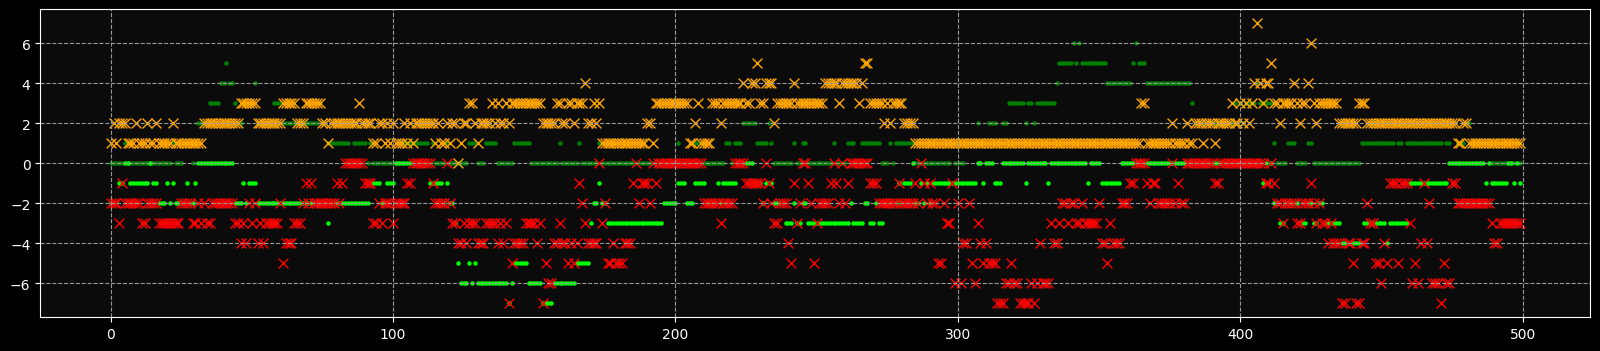

In [60]:

from numpy import load

# load dict of arrays
if 'predictions' not in globals():
    dict_data = load('predictions_small.npz')
    predictions = dict_data['predictions']

if 'test_labels' not in globals():
    dict_data = load('test_labels_small.npz')
    test_labels = dict_data['test_labels']

bbb = 0
sss = 500
ooo = test_labels[:,bbb:sss]
ppp = predictions[:,bbb:sss]
# ppp = np.copy(predictions[:,bbb:sss])

# for i in range(8,14):
#     ppp[i] = ppp[i-1] & ppp[i]

# for i in range(1,7):
#     ppp[i] = ppp[i-1] & ppp[i]

ppp_increase = ppp[7] + ppp[8] + ppp[9] + ppp[10] + ppp[11] + ppp[12] + ppp[13]
ppp_decrease = ppp[0] + ppp[1] + ppp[2] + ppp[3] + ppp[4] + ppp[5] + ppp[6]
ppp_buy = ((ppp_increase > (3 * ppp_decrease)) * ppp_increase).astype('float') 
ppp_sell = ((ppp_decrease > (3 * ppp_increase)) * ppp_decrease).astype('float') 

ppp_buy[ppp_buy == 0] = np.nan
ppp_sell[ppp_sell == 0] = np.nan

plt.figure(figsize=(20,4))
plt.scatter(range(sss - bbb), ooo[7] + ooo[8] + ooo[9] + ooo[10] + ooo[11] + ooo[12] + ooo[13], c='green', s=5, )
# plt.scatter(range(sss - bbb), ppp_buy, marker='^', c='orange', s=10)
plt.scatter(range(sss - bbb), ppp[7] + ppp[8] + ppp[9] + ppp[10] + ppp[11] + ppp[12] + ppp[13], marker='x', c='orange', s=50)

plt.scatter(range(sss - bbb), -(ooo[0] + ooo[1] + ooo[2] + ooo[3] + ooo[4] + ooo[5] + ooo[6]), c='lime', s=5, )
# plt.scatter(range(sss - bbb), -(ppp_sell), marker='v', c='red', s=10)
plt.scatter(range(sss - bbb), -(ppp[0] + ppp[1] + ppp[2] + ppp[3] + ppp[4] + ppp[5] + ppp[6]), marker='x', c='red', s=50)

plt.show()


In [11]:

dict_data = load('predictions_small.npz')
predictions = dict_data['predictions']

In [ ]:
%reset

In [107]:
pd.to_datetime(tt, unit='s')
test_raw_m15.shape

(984,)

In [74]:
predictions.shape
# test_labels.shape
ppp_increase.shape
df['label_up'].shape

(984,)

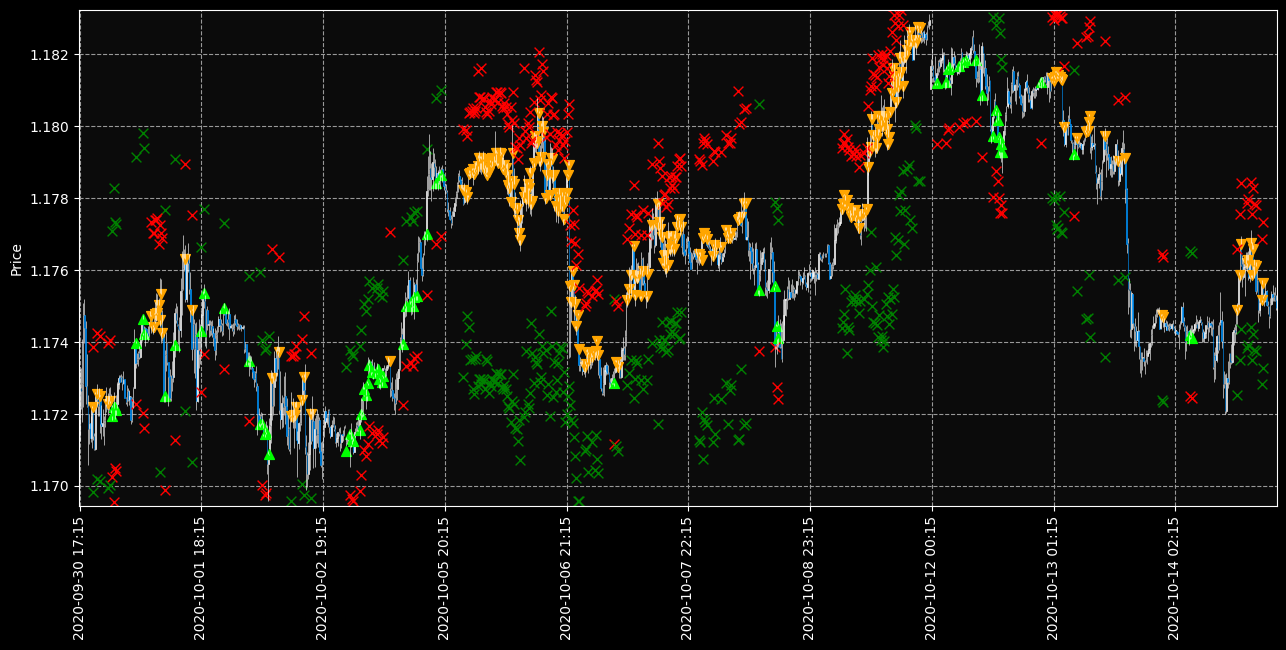

In [44]:
import matplotlib.pyplot as plt
import matplotlib.figure as mpfg
import mplfinance as mpf
import pandas as pd
from numpy import load


INPUT_SYMBOL = 'EURUSD'

if 'raw_data_m15' not in globals():
    dict_data = load(INPUT_SYMBOL + '_small.npz')
    raw_data_m15 = dict_data['m15']

# load dict of arrays
if 'ins' not in globals():
    dict_data = load('data_processed_ins_small.npz')
    ins = dict_data['ins']

if 'outs' not in globals():
    dict_data = load('data_processed_outs_small.npz')
    outs = dict_data['outs']


if 'predictions' not in globals():
    dict_data = load('predictions_small.npz')
    predictions = dict_data['predictions']



n = len(ins)
test_size = int(n * 0.3)

test_labels = outs[:,:test_size]

np_raw_m15 = np.array(raw_data_m15)
test_times = np.array(tt[:test_size])
test_raw_m15 = np_raw_m15[(np_raw_m15['time'] >= test_times.min()) & (np_raw_m15['time'] <= test_times.max())]
df = pd.DataFrame(data=test_raw_m15)
df = df[::-1].reset_index()
df['label_up'] = test_labels[7] + test_labels[8] + test_labels[9] + test_labels[10] + test_labels[11] + test_labels[12] + test_labels[13]
df['label_down'] = -(test_labels[0] + test_labels[1] + test_labels[2] + test_labels[3] + test_labels[4] + test_labels[5] + test_labels[6])
df['p_increase'] = predictions[7] + predictions[8] + predictions[9] + predictions[10] + predictions[11] + predictions[12] + predictions[13]
df['p_decrease'] = predictions[0] + predictions[1] + predictions[2] + predictions[3] + predictions[4] + predictions[5] + predictions[6]


SHIFT_TP = 0.5
SHIFT_SL = 0.8

should_buy = (df['p_decrease'] > SHIFT_SL) & (df['p_increase'] > (2 * df['p_decrease']))
# should_buy = (df['p_decrease'] > 0) & (df['p_increase'] > (2 * df['p_decrease']))
should_sell = (df['p_increase'] > SHIFT_SL) & (df['p_decrease'] > (2 * df['p_increase']))
# should_sell = (df['p_increase'] > 0) & (df['p_decrease'] > (3 * df['p_increase']))

df['buy'] = (should_buy * df['open']).astype('float')
df['sell'] = (should_sell * df['open']).astype('float')

df['buy'][df['buy'] == 0] = np.nan
df['sell'][df['sell'] == 0] = np.nan

df['buy_tp'] = df['buy'] * (1 + should_buy * (df['p_increase'] - SHIFT_TP) * 0.0008)
df['buy_sl'] = df['buy'] * (1 - should_buy * (df['p_decrease'] + SHIFT_SL) * 0.0008)

df['sell_tp'] = df['sell'] * (1 - should_sell * (df['p_decrease'] - SHIFT_TP) * 0.0008)
df['sell_sl'] = df['sell'] * (1 + should_sell * (df['p_increase'] + SHIFT_SL) * 0.0008)


# df = pd.DataFrame(data={'time':features_m15[121],'open':features_m15[0],'high':features_m15[1],'low':features_m15[2],'close':features_m15[3]})
# df['label_up'] = labels[7] + labels[8] + labels[9] + labels[10] + labels[11] + labels[12] + labels[13]
# df['label_down'] = -(labels[0] + labels[1] + labels[2] + labels[3] + labels[4] + labels[5] + labels[6])
df = df[::-1].reset_index()

df['Time'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index('Time')



p = df[:]

# p = df
apds = [
    # mpf.make_addplot(p['label'], type='scatter', markersize=20, color='green', secondary_y=True),
    # mpf.make_addplot(p['label_up'], type='scatter', markersize=10, color='green', secondary_y=True),
    # mpf.make_addplot(p['label_down'], type='scatter', markersize=10, color='orange', secondary_y=True),
    # mpf.make_addplot(p['p_increase'], type='scatter', markersize=20, color='lime', marker='x', secondary_y=True),
    # mpf.make_addplot(p['p_decrease'], type='scatter', markersize=20, color='red', marker='x', secondary_y=True),
    mpf.make_addplot(p['sell'], type='scatter',markersize=50, marker='v', color='orange'),
    mpf.make_addplot(p['buy'], type='scatter', markersize=50, marker='^', color='lime'),
    mpf.make_addplot(p['buy_tp'], type='scatter', markersize=50, marker='x', color='green'),
    mpf.make_addplot(p['buy_sl'], type='scatter', markersize=50, marker='x', color='red'),
    mpf.make_addplot(p['sell_tp'], type='scatter', markersize=50, marker='x', color='green'),
    mpf.make_addplot(p['sell_sl'], type='scatter', markersize=50, marker='x', color='red'),
]

fig, axes = mpf.plot(p, addplot=apds, figratio=(24, 10), type='candle', style='nightclouds', volume=False,
                     datetime_format='%Y-%m-%d %H:%M', xrotation=90, tight_layout=True, returnfig=True)
axes[0].locator_params(nbins=10, axis='x')
plt.show()